In [21]:
import os
from glob import glob
import numpy as np
from dataset import parse_data 

import matplotlib.pyplot as plt

In [6]:
def shuffle(X, Y):
    Y = Y.reshape(-1, 1)
    data = np.concatenate((X, Y), axis=1)
    np.random.shuffle(data)
    Y = data[:, -1].astype(np.uint8)
    X = data[:, :-1]
    return X, Y

In [7]:
root_dir=os.path.join('dataset', 'linearlySeparable')
X_train, Y_train = parse_data(root_dir, 'train')

X_train, Y_train = shuffle(X_train, Y_train)

In [67]:
import sys
class MultiPerceptron:
    def __init__(self):
        self.w = None # initialize during training
        self.b = None

    def predict(self, X):
        y_list = []
        for x in X:
            max_out = -sys.maxsize
            for c in self.classes:
                out = np.dot(x, self.w[c]) + self.b[c]
                out = np.where(out>=0, 1, 0)
                if out > max_out:
                    max_out = out
                    y = c
            y_list.append(y)

        return np.array(y_list)

        
    def fit(self, X, Y, epochs=1000, lr=0.001):
        n_examples, n_features = X.shape
        self.classes = np.unique(Y)

        self.w = {c : np.zeros(n_features) for c in self.classes}
        self.b = {c : 0 for c in self.classes}

        for epoch in range(epochs):
            for i, x in enumerate(X):
                for c in self.classes:
                    out = np.dot(x, self.w[c]) + self.b[c]
                    out = np.where(out>=0, 1, 0)
                    if c == Y[i]:
                        update = lr * (1 - out)
                    else:
                        update = lr * (0 - out)
                    self.w[c] += update * x 
                    self.b[c] += update


p = MultiPerceptron()
p.fit(X_train, Y_train-1, epochs=1000)

<AxesSubplot:>

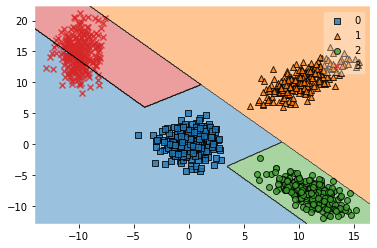

In [68]:
plot_decision_regions(X_train, Y_train-1, clf=p)

C:\Users\dsouz\miniconda3\envs\moc\lib\site-packages\mlxtend\plotting\decision_regions.py:274: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x=x_data,


<AxesSubplot:>

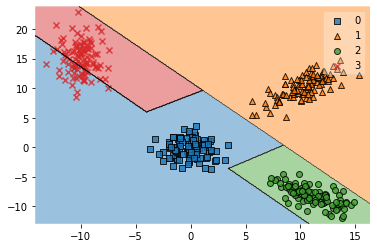

In [69]:
root_dir=os.path.join('dataset', 'linearlySeparable')
X_test, Y_test = parse_data(root_dir, 'test')
plot_decision_regions(X_test, Y_test-1, clf=p)